In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("lifeExpectancy.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
df.isnull().sum()
null_columns =df.columns[df.isnull().any()]

print(null_columns)

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [8]:
df.fillna(df[null_columns].mean(), inplace = True)


In [11]:
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [14]:
df.describe(include="object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [15]:
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Status'] = label_encoder.fit_transform(df['Status'])

In [19]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [31]:
y.shape

(2938,)

In [32]:
X.shape

(2938, 21)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [36]:
# MSE for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (MSE) for Linear Regression: {mse_linear}")

Mean Squared Error (MSE) for Linear Regression: 16.2445499713935


In [37]:
# RMSE for linear regression
rmse_linear = np.sqrt(mse_linear)
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {rmse_linear}")

Root Mean Squared Error (RMSE) for Linear Regression: 4.030452824608359


In [38]:
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test , y_pred_linear)
print(f"Mean Squared Error (MAE) for Linear Regression: {mae_linear}")

Mean Squared Error (MAE) for Linear Regression: 2.9972052638610838


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred_linear)
print(f"R-squared: {r2}")

R-squared: 0.821569718358355


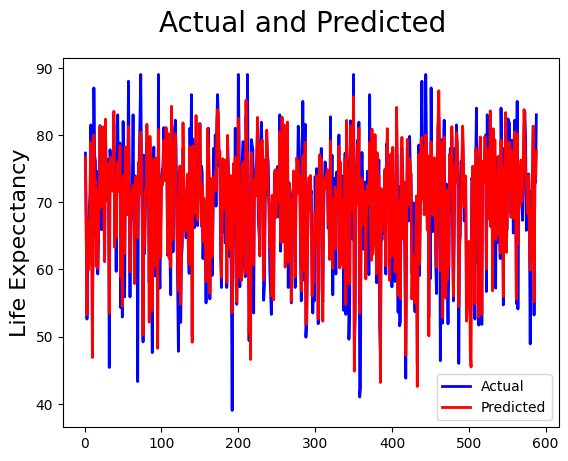

In [50]:
import matplotlib.pyplot as plt

# Generate index to match the length of y_test
c = [i for i in range(1, len(y_test) + 1)]

# Plotting the figure
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label="Actual")
plt.plot(c, y_pred_linear, color="red", linewidth=2, linestyle="-", label="Predicted")

# Adding title, labels, and legend
fig.suptitle('Actual and Predicted', fontsize=20)
plt.ylabel('Life Expecctancy', fontsize=16)
plt.legend()

# Show the plot
plt.show()


In [44]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [45]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE) for KNN Regression: {mse_knn}")

Mean Squared Error (MSE) for KNN Regression: 10.322067023539615


In [46]:
# MAE for knn
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Absolute Error (MAE) for KNN Regression: {mae_knn}")

Mean Absolute Error (MAE) for KNN Regression: 2.075476283409539


In [47]:
# R-squared for knn
r2_Knn = r2_score(y_test , y_pred_knn)
print(f"R-squared: {r2_Knn}")

R-squared: 0.8866223238330734


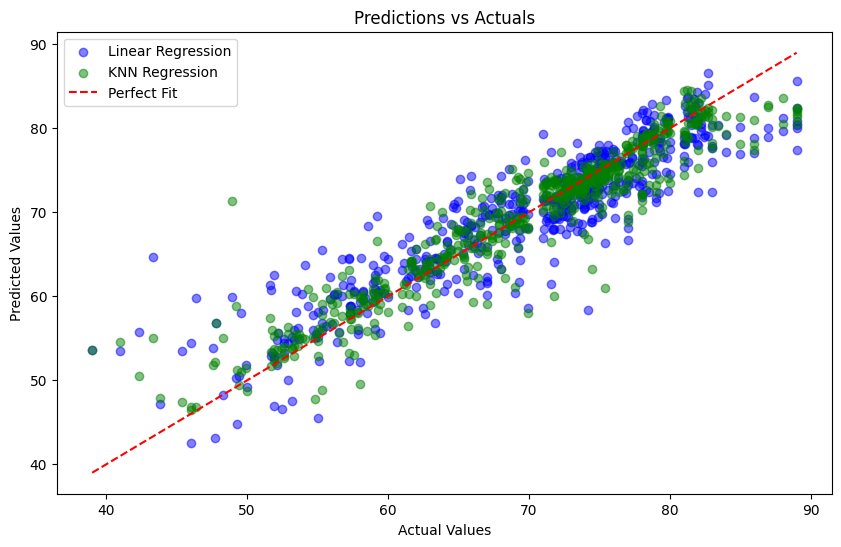

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green', label='KNN Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predictions vs Actuals")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [49]:
metrics = {
    "Model": ["Linear Regression", "KNN Regression"],
    "MSE": [mse_linear, mse_knn],
    "MAE": [mae_linear, mae_knn],
    "R²": [r2, r2_Knn]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

               Model        MSE       MAE        R²
0  Linear Regression  16.244550  2.997205  0.821570
1     KNN Regression  10.322067  2.075476  0.886622
